# GTEx PCA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm.auto import tqdm
from cmapPy.pandasGEXpress.parse_gct import parse
from cmapPy.pandasGEXpress.write_gct import write
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

In [2]:
# data_path = '../../data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz'
# data_path = '../../data/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct'
data_path = '../../data/input/GTEx/GTEx_v7_tpm_first1ksamples.gct'
data = parse(data_path)

In [3]:
# remove nan values from row_metadata (description column)
data.row_metadata_df.dropna(inplace=True)
# remove the entries of .data_df where nan values are in row_metadata
data.data_df = data.data_df.loc[data.row_metadata_df.index]

In [4]:
df = data.data_df
df

cid,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,...,GTEX-117XS-0426-SM-5GZZN,GTEX-117YW-0226-SM-5N9CM,GTEX-11DXX-0426-SM-5EQ5F,GTEX-11DXZ-0426-SM-5987Y,GTEX-11DYG-1226-SM-5N9DC,GTEX-11EM3-0226-SM-5985Y,GTEX-11EMC-0926-SM-59863,GTEX-11GS4-0326-SM-5N9F7,GTEX-11GSP-1126-SM-5A5LM,GTEX-11I78-0726-SM-5A5M1
rid,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,0.108200,0.11580,0.02104,0.02329,0.00000,0.046410,0.03076,0.093580,0.12100,0.02859,...,0.03002,0.000000,0.034790,0.000000,0.000000,0.02910,0.06347,0.08840,0.07348,0.070280
ENSG00000227232.4,21.400000,11.03000,16.75000,8.17200,7.65800,9.372000,10.08000,13.560000,9.88900,9.12100,...,12.09000,15.750000,11.900000,13.110000,17.240000,12.40000,15.17000,13.09000,10.38000,13.950000
ENSG00000243485.2,0.160200,0.06433,0.04674,0.00000,0.05864,0.000000,0.13670,0.207900,0.05375,0.06351,...,0.20000,0.000000,0.154600,0.119600,0.000000,0.06465,0.00000,0.00000,0.24490,0.000000
ENSG00000237613.2,0.050450,0.00000,0.02945,0.03260,0.00000,0.000000,0.08610,0.131000,0.06773,0.00000,...,0.08402,0.000000,0.146100,0.037680,0.000000,0.04073,0.04441,0.04124,0.05142,0.098360
ENSG00000268020.2,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.11080,0.056190,0.00000,0.00000,...,0.05407,0.000000,0.000000,0.097010,0.000000,0.20970,0.05717,0.05308,0.06619,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,3754.000000,3637.00000,3193.00000,2438.00000,5230.00000,5123.000000,2686.00000,13750.000000,3253.00000,4859.00000,...,2575.00000,928.799988,16040.000000,10160.000000,628.200012,15150.00000,2566.00000,2530.00000,2951.00000,15130.000000
ENSG00000210194.1,16.040001,7.16000,4.68200,5.75900,31.33000,26.389999,6.84500,50.900002,3.59000,10.60000,...,4.45300,2.119000,49.889999,42.599998,0.000000,63.32000,5.49200,6.55700,6.35900,52.130001
ENSG00000198727.2,6856.000000,19180.00000,21450.00000,13020.00000,37080.00000,34630.000000,24690.00000,14750.000000,28430.00000,34550.00000,...,12990.00000,5114.000000,20340.000000,15430.000000,4478.000000,17910.00000,8267.00000,13280.00000,12390.00000,17560.000000


In [5]:
# df = df.T  # Transpose for samples as rows
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
tensor_data = torch.FloatTensor(scaled_data)

In [6]:
tensor_data.shape

torch.Size([56202, 1000])

In [7]:
final_df = pd.DataFrame(tensor_data.numpy(), index=df.index, columns=df.columns)
final_df.index.names = ['gene_id']

In [8]:
final_df

cid,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,...,GTEX-117XS-0426-SM-5GZZN,GTEX-117YW-0226-SM-5N9CM,GTEX-11DXX-0426-SM-5EQ5F,GTEX-11DXZ-0426-SM-5987Y,GTEX-11DYG-1226-SM-5N9DC,GTEX-11EM3-0226-SM-5985Y,GTEX-11EMC-0926-SM-59863,GTEX-11GS4-0326-SM-5N9F7,GTEX-11GSP-1126-SM-5A5LM,GTEX-11I78-0726-SM-5A5M1
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,-0.082987,-0.058305,-0.051023,-0.050938,-0.031879,-0.036824,-0.046011,-0.064201,-0.038321,-0.038764,...,-0.078861,-0.082159,-0.060522,-0.068262,-0.100414,-0.058646,-0.083636,-0.068387,-0.079357,-0.061733
ENSG00000227232.4,0.016926,-0.022307,-0.002995,-0.027579,-0.018158,-0.017474,-0.019980,-0.015354,-0.017139,-0.018923,...,-0.025320,-0.009433,-0.020084,-0.017966,-0.003122,-0.017805,-0.012373,-0.018166,-0.033199,-0.013386
ENSG00000243485.2,-0.082743,-0.058475,-0.050949,-0.051004,-0.031774,-0.036920,-0.045736,-0.063786,-0.038467,-0.038688,...,-0.078106,-0.082159,-0.060113,-0.067803,-0.100414,-0.058529,-0.083935,-0.068728,-0.078589,-0.061978
ENSG00000237613.2,-0.083258,-0.058687,-0.050999,-0.050911,-0.031879,-0.036920,-0.045867,-0.064065,-0.038436,-0.038826,...,-0.078621,-0.082159,-0.060142,-0.068118,-0.100414,-0.058608,-0.083726,-0.068569,-0.079456,-0.061635
ENSG00000268020.2,-0.083494,-0.058687,-0.051084,-0.051004,-0.031879,-0.036920,-0.045803,-0.064337,-0.038583,-0.038826,...,-0.078754,-0.082159,-0.060640,-0.067890,-0.100414,-0.058050,-0.083666,-0.068523,-0.079390,-0.061978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,17.532299,11.937016,9.115935,6.937676,9.338383,10.593187,6.911654,49.810970,7.015409,10.564078,...,11.352932,4.206591,54.604874,38.910755,3.444774,49.957539,12.020820,9.703732,13.136369,52.640259
ENSG00000210194.1,-0.008226,-0.035072,-0.037642,-0.034496,0.024253,0.017838,-0.028359,0.120090,-0.030798,-0.015696,...,-0.059225,-0.072375,0.109388,0.095173,-0.100414,0.150303,-0.058028,-0.043401,-0.051207,0.119606
ENSG00000198727.2,32.088554,63.201576,61.531307,37.271645,66.402016,71.819534,63.910248,53.438278,61.610661,75.353302,...,57.591194,23.531826,69.259590,59.129204,25.170767,59.069416,38.914509,51.227032,55.408932,61.104660


In [9]:
# Perform PCA
num_pc = 100
pca = PCA(n_components=num_pc)
pca_result = pca.fit_transform(final_df)
pca_columns = [f'PC{i}' for i in range(1, num_pc+1)]
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns, index=final_df.index)

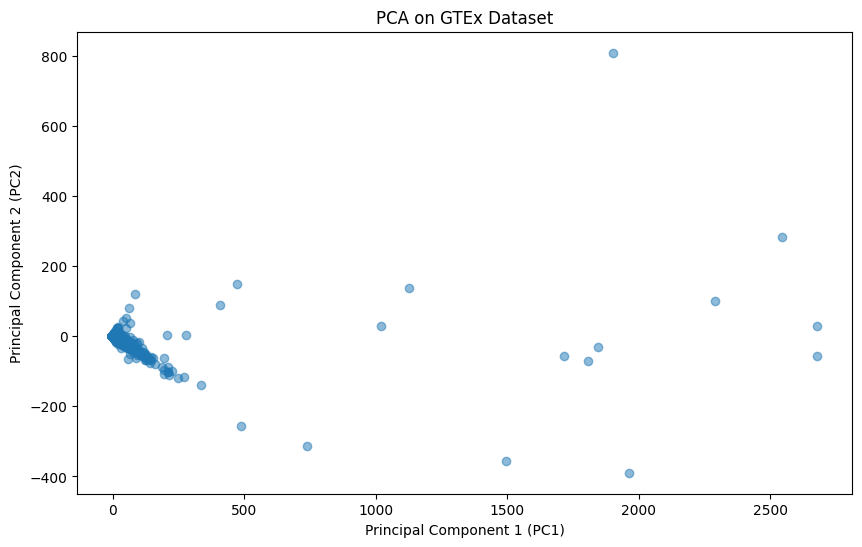

In [10]:
# Plot the PCA results for the first two components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA on GTEx Dataset')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

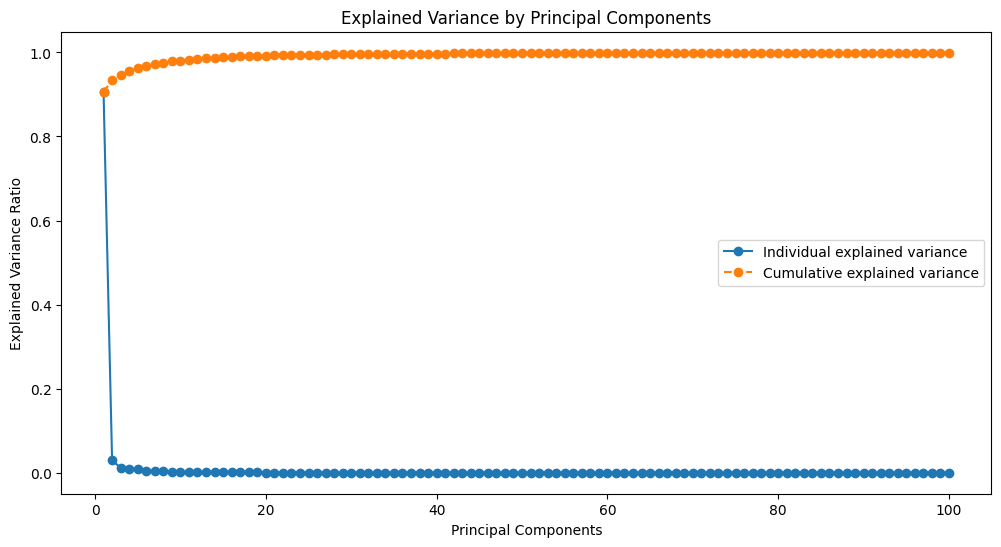

In [11]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance for each principal component as a line plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', label='Individual explained variance')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='--', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

In [12]:
# Extract embeddings
embedding_dim = 64
embeddings = pca_df[[f'PC{i}' for i in range(1, embedding_dim+1)]]

embeddings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,-1.364982,0.316320,-0.241062,-0.175590,-0.002436,-0.063941,-0.038881,-0.023811,0.021395,0.035858,...,0.000407,-0.007422,-0.003605,0.006292,-0.002596,-0.005666,-0.000965,-0.008060,-0.003836,0.006392
ENSG00000227232.4,-0.481145,-0.071673,-0.096410,-0.004636,0.073483,-0.039850,0.019488,0.019850,-0.060591,-0.014196,...,0.015968,-0.002130,-0.015583,-0.029362,-0.016245,-0.009387,0.024475,-0.012392,-0.006477,0.001459
ENSG00000243485.2,-1.363980,0.316482,-0.240126,-0.176003,-0.003303,-0.063334,-0.038492,-0.024918,0.019590,0.036623,...,0.000761,-0.008598,-0.003781,0.005714,-0.002827,-0.004589,-0.001611,-0.007755,-0.002042,0.006908
ENSG00000237613.2,-1.366807,0.316600,-0.240911,-0.176202,-0.003093,-0.064297,-0.038785,-0.024248,0.020732,0.036611,...,-0.000787,-0.009088,-0.006659,0.007476,-0.003629,-0.003398,0.001837,-0.007429,-0.006489,0.005013
ENSG00000268020.2,-1.367859,0.316906,-0.241183,-0.175883,-0.002811,-0.063220,-0.038724,-0.025464,0.020945,0.035228,...,-0.000272,-0.006783,-0.004498,0.004923,-0.002644,-0.004214,-0.002106,-0.007965,-0.002940,0.006519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,471.081970,149.087158,115.096153,-2.767800,-147.584793,44.731590,93.339828,-50.801010,195.445648,-37.182323,...,0.379259,-1.572132,-1.467357,-0.417146,-0.565487,-1.598092,0.462786,1.760353,-1.746070,0.649752
ENSG00000210194.1,0.400548,0.947056,0.330750,-0.188093,-0.567952,-0.021040,0.369668,-0.269262,0.879654,-0.084279,...,-0.031791,-0.035734,0.018214,0.006186,0.028741,-0.036586,0.022865,0.010028,-0.007707,0.006488
ENSG00000198727.2,1806.283813,-69.349922,-21.778912,-144.830170,-6.193927,3.099550,82.500420,61.617199,3.790691,11.321987,...,0.706224,-0.926224,-1.487032,1.811653,0.020085,0.663735,0.740733,-1.199092,1.032832,1.158748


In [13]:
embeddings.index

Index(['ENSG00000223972.4', 'ENSG00000227232.4', 'ENSG00000243485.2',
       'ENSG00000237613.2', 'ENSG00000268020.2', 'ENSG00000240361.1',
       'ENSG00000186092.4', 'ENSG00000238009.2', 'ENSG00000233750.3',
       'ENSG00000237683.5',
       ...
       'ENSG00000198886.2', 'ENSG00000210176.1', 'ENSG00000210184.1',
       'ENSG00000210191.1', 'ENSG00000198786.2', 'ENSG00000198695.2',
       'ENSG00000210194.1', 'ENSG00000198727.2', 'ENSG00000210195.2',
       'ENSG00000210196.2'],
      dtype='object', name='gene_id', length=56202)

In [14]:
# reformat gene_id: drop decimals
embeddings.index = embeddings.index.str.split('.').str[0]
embeddings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972,-1.364982,0.316320,-0.241062,-0.175590,-0.002436,-0.063941,-0.038881,-0.023811,0.021395,0.035858,...,0.000407,-0.007422,-0.003605,0.006292,-0.002596,-0.005666,-0.000965,-0.008060,-0.003836,0.006392
ENSG00000227232,-0.481145,-0.071673,-0.096410,-0.004636,0.073483,-0.039850,0.019488,0.019850,-0.060591,-0.014196,...,0.015968,-0.002130,-0.015583,-0.029362,-0.016245,-0.009387,0.024475,-0.012392,-0.006477,0.001459
ENSG00000243485,-1.363980,0.316482,-0.240126,-0.176003,-0.003303,-0.063334,-0.038492,-0.024918,0.019590,0.036623,...,0.000761,-0.008598,-0.003781,0.005714,-0.002827,-0.004589,-0.001611,-0.007755,-0.002042,0.006908
ENSG00000237613,-1.366807,0.316600,-0.240911,-0.176202,-0.003093,-0.064297,-0.038785,-0.024248,0.020732,0.036611,...,-0.000787,-0.009088,-0.006659,0.007476,-0.003629,-0.003398,0.001837,-0.007429,-0.006489,0.005013
ENSG00000268020,-1.367859,0.316906,-0.241183,-0.175883,-0.002811,-0.063220,-0.038724,-0.025464,0.020945,0.035228,...,-0.000272,-0.006783,-0.004498,0.004923,-0.002644,-0.004214,-0.002106,-0.007965,-0.002940,0.006519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,471.081970,149.087158,115.096153,-2.767800,-147.584793,44.731590,93.339828,-50.801010,195.445648,-37.182323,...,0.379259,-1.572132,-1.467357,-0.417146,-0.565487,-1.598092,0.462786,1.760353,-1.746070,0.649752
ENSG00000210194,0.400548,0.947056,0.330750,-0.188093,-0.567952,-0.021040,0.369668,-0.269262,0.879654,-0.084279,...,-0.031791,-0.035734,0.018214,0.006186,0.028741,-0.036586,0.022865,0.010028,-0.007707,0.006488
ENSG00000198727,1806.283813,-69.349922,-21.778912,-144.830170,-6.193927,3.099550,82.500420,61.617199,3.790691,11.321987,...,0.706224,-0.926224,-1.487032,1.811653,0.020085,0.663735,0.740733,-1.199092,1.032832,1.158748


In [15]:
emb_path = '../../data/embeddings/GTEx_PCA_d'+str(embedding_dim)+'.tsv'
embeddings.to_csv(emb_path, sep='\t', index=True)